# Kernel based discrepancies

One definition of discrepancy starts with a symmetric, positive definite kernel, $K:[0,1]^d\times [0,1]^d \to \mathbb{R}$, i.e.,
\begin{gather*}
K(\boldsymbol{t},\boldsymbol{x}) = K(\boldsymbol{x},\boldsymbol{t}) \qquad \forall \boldsymbol{t}, \boldsymbol{x} \in [0,1]^d \\
\sum_{i,j = 1}^{n} c_i K(\boldsymbol{x}_i,\boldsymbol{x}_j ) \boldsymbol{c}_j > 0 \qquad \forall \boldsymbol{c} \ne \boldsymbol{0}, \ \boldsymbol{x}_1, \ldots, \boldsymbol{x}_n \text{ distinct and } \in [0,1]^d
\end{gather*}
The discrepancy, $D(\{\boldsymbol{x}\}_{i=1}^n)$ is defined in terms of the kernel as
$$
[D(\{\boldsymbol{x}_i\}_{i=1}^n,K)]^2= \int_{[0,1]^d} \int_{[0,1]^d} K(\boldsymbol{t},\boldsymbol{x}) \, \mathrm{d}\boldsymbol{t} \mathrm{d}\boldsymbol{x}
- \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(\boldsymbol{t}, \boldsymbol{x}_i) \, \mathrm{d}\boldsymbol{t}
+ \frac{1}{n^2} \sum_{i,j = 1}^n K(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$
The discrepancy requires $\mathcal{O}(dn^2)$ operations to compute, assuming one evaluation of the kernel requires $d$ operations to compute.

We can simplify the cost to compute the discrepancy for a randomly shifted Kronecker sequence:
$$
\begin{aligned}
\text{Kronecker: } \mathbb{E}\{[D(\{i\boldsymbol{\alpha} + \boldsymbol{\Delta} \bmod \boldsymbol{1}\}_{i=1}^n,K)]^2\}
& = - \int_{[0,1]^d} \widetilde{K}(\boldsymbol{t}) \, \mathrm{d}\boldsymbol{t} + \frac{1}{n^2} \sum_{i,j = 1}^n \int_{[0,1]^d} \widetilde{K}((i - j)\boldsymbol{\alpha} \bmod \boldsymbol{1}) \\
& =  - \int_{[0,1]^d} \widetilde{K}(\boldsymbol{t}) \, \mathrm{d}\boldsymbol{t} 
+ \frac 1{n^2} \sum_{k=1-n}^{n-1}  (n -  \lvert k \rvert)\widetilde{K}(k \boldsymbol{\alpha} \bmod \boldsymbol{1}) \\
& = - \int_{[0,1]^d} \widetilde{K}(\boldsymbol{t}) \, \mathrm{d}\boldsymbol{t}
+ \frac 1{n^2} \biggl[n \widetilde{K}(\boldsymbol{0}) +  2\sum_{k=1}^{n-1}  (n - k)\widetilde{K} (k \boldsymbol{\alpha} \bmod \boldsymbol{1}) \biggr] \\
\end{aligned}
$$

$$
2\sum_{k=1}^{n-1}  (n - k)\widetilde{K} (k \boldsymbol{\alpha} \bmod \boldsymbol{1}) \\
= 2\left(n\sum_{k=1}^{n-1} \widetilde{K} (k \boldsymbol{\alpha} \bmod \boldsymbol{1}) - \sum_{k=1}^{n-1} k\widetilde{K} (k \boldsymbol{\alpha} \bmod \boldsymbol{1})\right)
$$

After splitting the above summation, we can compute the discrepancy values for n = 1,2,...,N in $\mathcal{O}(dN)$ time.
The code can be found at qmcpy/discrete_distribution/kronecker.py.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qmcpy as qp
figpath = '' #this path sends the figures to the directory that you want
savefigs = True
imgfrmt = 'pdf' #kind of format to save figures as

# Example with a Specified $\widetilde{K}$

Take $\widetilde{K}(x) = \prod_{\ell = 1}^d \left [1 + \gamma_\ell B_2(x_\ell) \right] = \prod_{\ell = 1}^d \left [1 + \gamma_\ell \left \{x_\ell(x_\ell - 1) + \frac 16 \right\}\right] $ with $d=2$ and $\gamma_\ell = 1$.

In [2]:
def k_tilde(x, gamma):
    return np.prod(1 + (x * (x - 1) + 1/6) * gamma)

In [3]:
np.random.seed(42)
alpha = np.random.rand(2)
kronecker = qp.Kronecker(dimension=2, alpha=alpha)

[0.5488135  0.71518937]


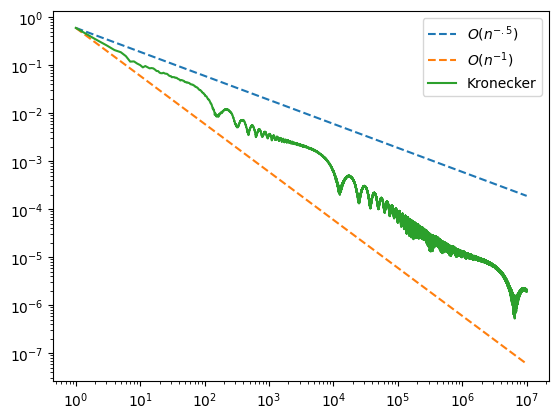

[0.417022   0.72032449]


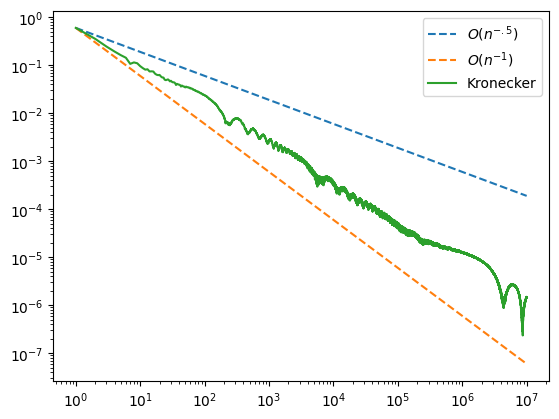

[0.4359949  0.02592623]


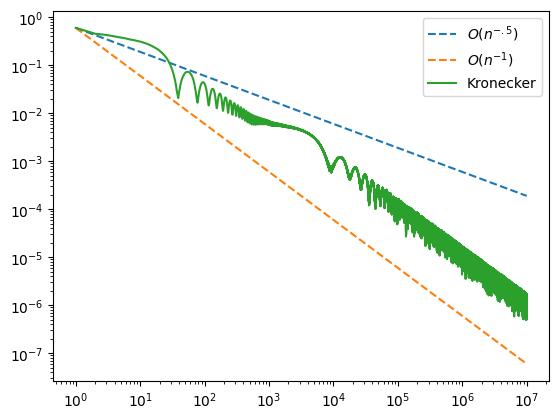

[0.5507979  0.70814782]


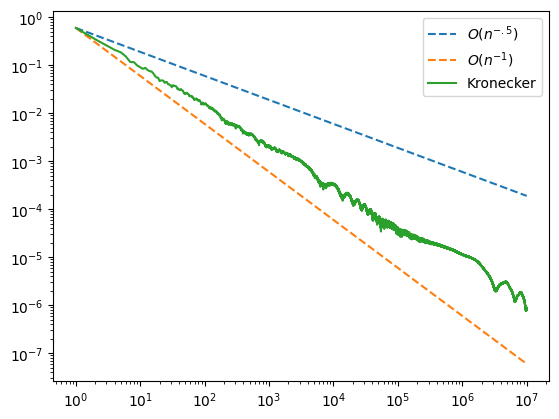

[0.96702984 0.54723225]


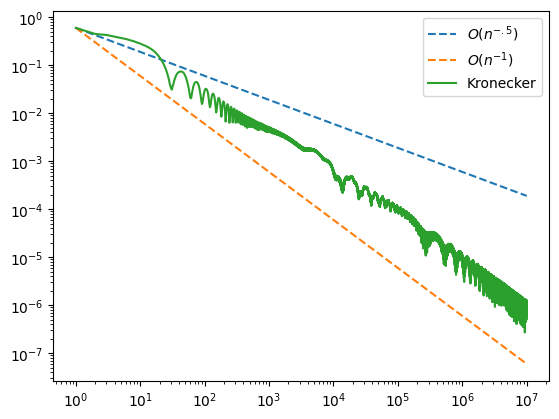

In [7]:
for i in range(5):
    np.random.seed(i)
    random = np.random.rand(2)
    print(random)
    kronecker = qp.Kronecker(dimension=2, alpha=random)
    values = kronecker.kronecker_discrepancy(10000000, k_tilde, np.ones(2), 1)
    
    x = np.arange(1, 10000001)
    y = values[0] / x # multiply by values[0] to get the same starting point
    y_half = values[0] / np.sqrt(x)


    plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
    plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
    plt.loglog(x, values, label="Kronecker")

    plt.legend()
    plt.show()



Result of 10 calls to alpha_generate(2, 100, 10000):
[0.36605477, 0.22594551]
[0.41967733, 0.29759196]
[0.35401876, 0.3883768 ]
[0.41887552, 0.31377273]
[0.38171127, 0.13552828]
[0.27933364, 0.39162271]
[0.29321226, 0.22901532]
[0.27862966, 0.21579744]
[0.38208775, 0.21575906]
[0.26876165, 0.40584127]

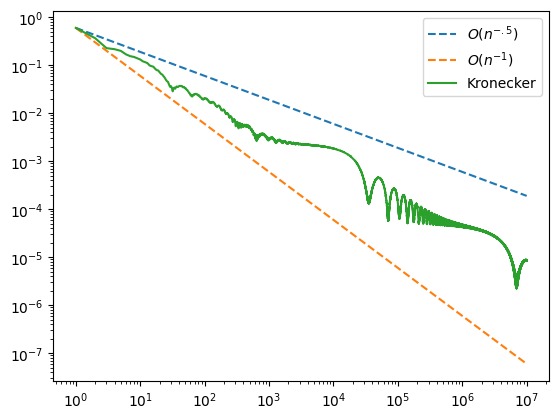

In [ ]:
# taking the average in the first and second component
kronecker = qp.Kronecker(dimension=2, alpha=[0.344236261, 0.281925108])
values = kronecker.kronecker_discrepancy(10000000, k_tilde, np.ones(2), 1)
x = np.arange(1, 10000001)
y = values[0] / x
y_half = values[0] / np.sqrt(x)

plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
plt.loglog(x, values, label="Kronecker")

plt.legend()
plt.show()

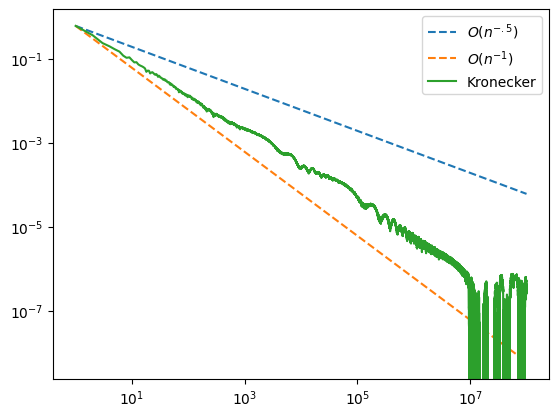

In [9]:
# would calling alpha_generate for 10 dimensions and taking the first two components be good choices for the first two dimensions?
kronecker = qp.Kronecker(dimension=2, alpha=[0.38206516, 0.27858891])
values = kronecker.kronecker_discrepancy(100000000, k_tilde, np.ones(2), 1)
x = np.arange(1, 100000001)
y = values[0] / x
y_half = values[0] / np.sqrt(x)

plt.loglog(x, y_half, label = '$O(n^{-.5})$', linestyle = '--')
plt.loglog(x, y, label = '$O(n^{-1})$', linestyle = '--')
plt.loglog(x, values, label="Kronecker")

plt.legend()
plt.show()

In [10]:
values

array([6.00925213e-01, 3.60387247e-01, 2.34005758e-01, ...,
       3.70436993e-07, 3.70436993e-07, 3.70736578e-07])